# Final Course Project

## Problem Statement

Createa Machine Learning model using various Classification Models to predict rainfall.

## Q.1) Your views about the problem statement?

Machine learning models are able to make predictions faster and more accurately then any manual methods, it can help the company "The Daily Buzz” make accurate data-driven predictions of rainfall using all the important factors influencing the weather like location, minimum and maximum temparature, humidity, pressure, evaporation etc present in the dataset. This technique can help the newspaper accurately predict the rainfall and inform its readers and also the authorities to take pro-active measures.

## Q.2) What will be your approach to solving this task?
My approach to solving this task:
1) Upload and analyze the data into jupyter notebook. 
2) Perform Data Pre-processing like cleaning data, transforming data. Handling missing values, outliers and categorical veriables.
3) Spliting the available data in 80:20 ration to perform training and testing of the models.
3) Training and testing the models using different classification techniques like Bagging, Boosting, Decision Trees and Ensemble methods with available data.
4) Chosing the model and classification techique with best accuracy and ROC AUC score.
5) Steps to improve the selected model's performance.

In [2]:
# importing importent libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

## Uploading Data

In [365]:
#uploading data into pandas dataset
df = pd.read_csv('C:/Users/AKSHAY TRIPATHI/OneDrive/Desktop/DATA SCIENCE/Course Final Project/sydney_rain prediction.csv', header = 0)

In [366]:
# Looking at the available data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [367]:
df.shape

(3337, 17)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am , Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday columns have missing values in it

## Data Pre-processing

In [369]:
# Performing EDD for numerical variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


Need to check for outliers in MinTemp, MaxTemp, Rainfall, Evaporation, Humidity9am, Humidity3pm,Temp3pm, cloud9am columns.

In [370]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

### Missing Value Imputations

In [371]:
# Replacing nan values with mean  value of the column 
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

For categorical variable RainyToday we need to impute missing values with most frequent value in the column 

In [372]:
# Counting the most frequent value in the column
df['RainToday'].value_counts()

No     2465
Yes     866
Name: RainToday, dtype: int64

In [373]:
# Replacing the NA values with most frequent value
df['RainToday']=df['RainToday'].fillna("No")

In [374]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

All missing values in the dataset have been treated

Checking for outliers in MinTemp, MaxTemp, Rainfall, Evaporation, Humidity9am, Humidity3pm,Temp3pm, cloud9am columns using boxplot.

<Axes: xlabel='MinTemp'>

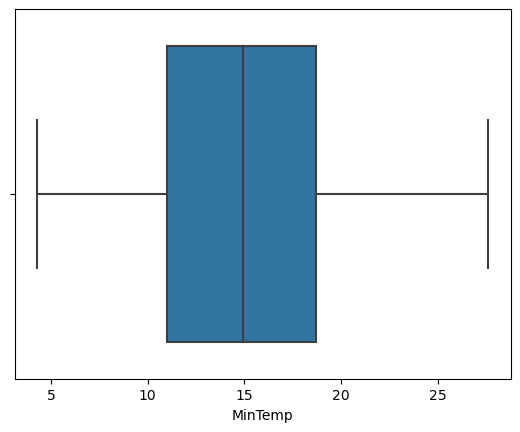

In [26]:
# Checking for outliers using box plot for MinTemp
sns.boxplot(x=df["MinTemp"])

No visible outliers

<Axes: xlabel='MaxTemp'>

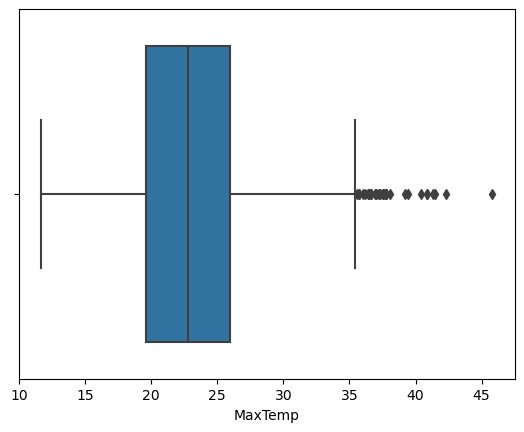

In [27]:
# Checking for outliers using box plot for MaxTemp
sns.boxplot(x=df["MaxTemp"])

Possible outliers can be seen

<Axes: xlabel='Rainfall'>

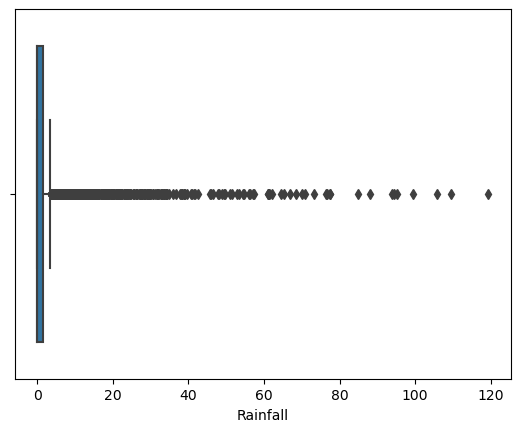

In [28]:
# Checking for outliers using box plot for Rainfall
sns.boxplot(x=df["Rainfall"])

Possible outliers can be seen

<Axes: xlabel='Evaporation'>

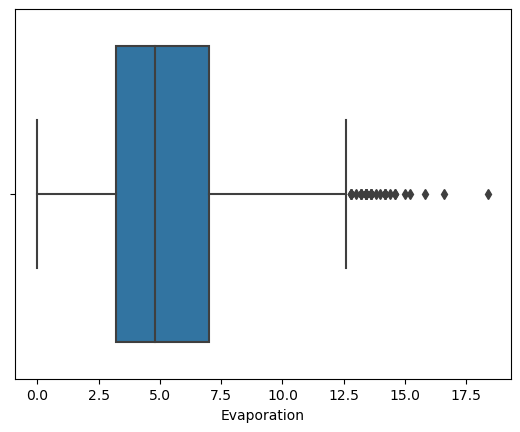

In [29]:
# Checking for outliers using box plot for Evaporation
sns.boxplot(x=df["Evaporation"])

Possible outliers can be seen

<Axes: xlabel='Humidity9am'>

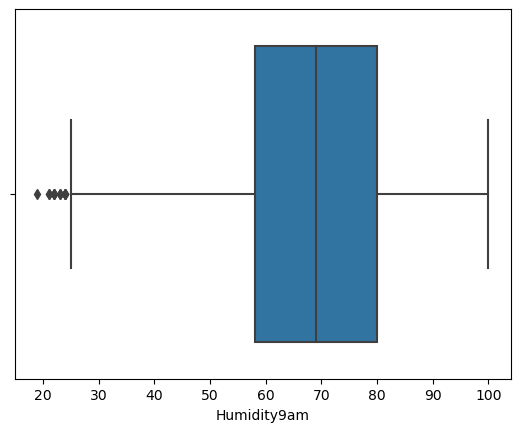

In [30]:
# Checking for outliers using box plot for Humidity9am
sns.boxplot(x=df["Humidity9am"])

Possible outliers can be seen

<Axes: xlabel='Humidity3pm'>

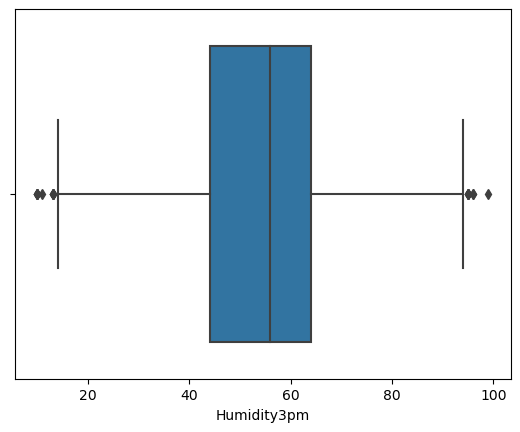

In [32]:
# Checking for outliers using box plot for Humidity3pm
sns.boxplot(x=df["Humidity3pm"])

Possible outliers can be seen

<Axes: xlabel='Temp3pm'>

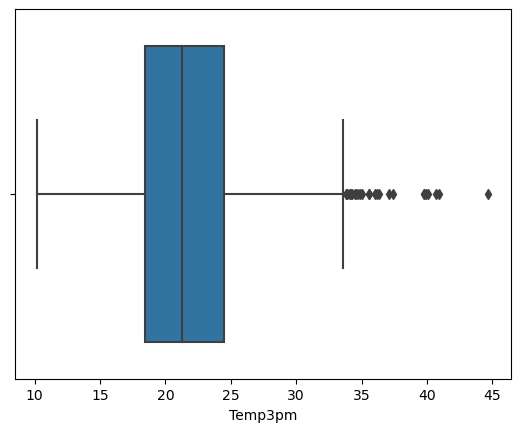

In [33]:
# Checking for outliers using box plot for Temp3pm
sns.boxplot(x=df["Temp3pm"])

Possible outliers can be seen

Treating Categorical Variables

<Axes: xlabel='RainToday', ylabel='count'>

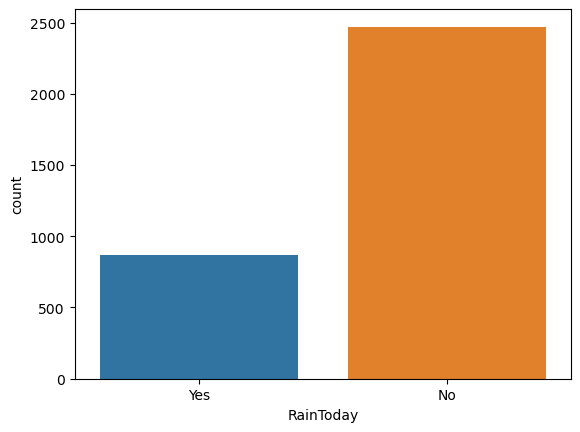

In [34]:
# for categorical veriables
sns.countplot(data=df, x='RainToday')

In [375]:
# Creating dummy variable RainToday and RainTomorrow column using getdummies function
df = pd.get_dummies(df, columns = ['RainToday', 'RainTomorrow'], drop_first = True)

In [376]:
# removing location columns as it has a single uniqe value
df = df.drop(['Location'], axis=1)

In [377]:
# removing date columns as it does not effect the model
df = df.drop(['Date'], axis=1)

In [378]:
df.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
5,20.2,27.2,1.6,2.600000,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1
6,18.6,26.3,6.2,5.200000,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,1,1
7,17.2,22.3,27.6,5.800000,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,1,1
8,16.4,20.8,12.6,4.800000,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,1,1
9,14.6,24.2,8.8,4.400000,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,1,0


## Outlier Treatment
To treat outliers we can use capping and flooring techniques.

In [158]:
# Treating outlier for maxtemp variable
uv=np.percentile(df.MaxTemp,[99])[0] # Generating the 99th percentile value
uv

35.52799999999998

In [159]:
df[df.MaxTemp>uv] # Generating row with values greater then 99th percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
358,24.8,40.9,0.000000,10.6,11.100000,55.00000,20.0,1004.8,1002.8,6.000000,2.00000,31.5,40.1,0,0
641,18.9,36.9,0.000000,6.2,11.000000,73.00000,18.0,1011.9,1006.6,6.000000,6.00000,24.0,36.3,0,0
660,21.2,40.4,0.000000,7.4,6.000000,75.00000,19.0,1005.0,1001.5,6.000000,7.00000,24.0,39.8,0,0
722,25.0,41.3,0.000000,13.4,5.600000,28.00000,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,1,0
742,23.9,37.8,0.000000,9.0,9.800000,71.00000,32.0,1008.7,1005.5,6.000000,7.00000,26.9,37.4,1,0
1095,25.1,37.5,0.000000,10.2,5.700000,58.00000,54.0,1011.0,1009.9,4.181523,4.21866,30.6,33.6,0,0
1097,24.2,41.5,0.000000,8.4,12.400000,46.00000,22.0,1010.0,1006.6,4.181523,4.21866,33.7,40.9,0,0
1098,27.6,35.6,0.000000,16.6,2.600000,56.00000,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1349,19.8,37.2,0.000000,4.4,9.700000,68.22901,23.0,1009.5,1004.9,4.181523,4.21866,26.2,34.9,0,0
1739,20.9,42.3,0.000000,9.8,8.700000,52.00000,14.0,1005.8,999.1,6.000000,6.00000,27.3,39.8,0,0


No value of MaxTemp is greater then even 1.5 times of 99 percentile value hence capping and further outlier treatment not required.

In [379]:
# Treating outlier for Rainfall variable
uv=np.percentile(df.Rainfall,[99])[0] #Generating the 99th percentile value
uv

52.29599999999982

In [380]:
df[df.Rainfall>uv] # Generating row with values greater then 99th percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,19.7,25.7,77.4,5.187432,0.000000,88.0,74.0,1008.3,1004.8,8.000000,8.00000,22.5,25.5,1,1
218,11.8,14.2,62.2,5.187432,0.000000,92.0,88.0,1014.8,1013.1,8.000000,8.00000,13.0,12.3,1,1
633,14.4,17.0,73.2,5.187432,0.000000,91.0,60.0,1023.7,1025.3,8.000000,8.00000,14.7,16.6,1,1
737,20.2,25.0,77.4,7.400000,0.200000,95.0,86.0,1021.6,1020.8,7.000000,8.00000,21.1,23.8,1,1
743,21.4,25.5,70.0,9.400000,0.300000,92.0,80.0,1011.9,1010.2,8.000000,8.00000,22.1,25.2,1,1
855,12.5,20.5,61.4,1.000000,4.400000,80.0,67.0,1014.2,1012.0,5.000000,7.00000,13.5,17.4,1,0
1140,18.8,23.5,99.4,5.187432,3.300000,92.0,81.0,1012.4,1010.1,4.181523,4.21866,19.4,22.2,1,1
1182,13.9,19.9,65.2,5.187432,0.700000,81.0,62.0,1019.5,1019.3,4.181523,4.21866,17.9,19.6,1,1
1232,8.7,18.5,76.8,5.187432,1.600000,91.0,83.0,1012.7,1013.5,4.181523,4.21866,14.3,15.0,1,1
1234,11.3,13.9,88.2,5.187432,0.000000,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1


Capping values greater then 2 times of 99 percentile to 2*uv

In [381]:
df.Rainfall[(df.Rainfall>2*uv)]=2*uv

C:\Users\AKSHAY TRIPATHI\AppData\Local\Temp\ipykernel_18660\2452003772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall>2*uv)]=2*uv


In [165]:
# Treating outlier for Evaporation variable
uv=np.percentile(df.Evaporation,[99])[0]  #Generating the 99th percentile value
uv

12.8

In [167]:
df[df.Evaporation>uv] # Generating row with values greater then 99th percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
349,23.0,33.4,0.0,14.2,9.400000,61.0,39.0,1009.1,1006.0,4.181523,6.00000,28.6,33.1,1,0
357,25.0,31.7,0.0,14.2,11.900000,59.0,58.0,1009.2,1007.6,1.000000,2.00000,29.5,29.1,0,0
359,20.5,25.9,0.0,13.6,6.800000,57.0,51.0,1019.5,1018.3,7.000000,5.00000,21.9,24.7,0,0
373,21.4,28.6,0.0,14.2,12.200000,69.0,53.0,1010.8,1007.5,0.000000,1.00000,24.2,28.1,0,0
642,19.4,19.9,0.0,13.2,0.000000,71.0,76.0,1017.9,1015.5,8.000000,8.00000,19.7,19.1,0,0
661,19.9,22.8,0.0,13.4,0.300000,62.0,68.0,1021.0,1022.6,7.000000,8.00000,21.4,20.4,0,0
686,20.2,21.4,5.4,13.6,0.000000,87.0,83.0,1014.1,1016.7,8.000000,8.00000,20.2,18.5,1,1
722,25.0,41.3,0.0,13.4,5.600000,28.0,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,1,0
1098,27.6,35.6,0.0,16.6,2.600000,56.0,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1400,20.7,29.4,0.0,13.4,8.400000,69.0,59.0,1012.6,1010.2,4.181523,4.21866,25.0,27.8,0,0


No value of Evaporation is greater then even 1.5 times of 99 percentile value hence capping and further outlier treatment not required.

In [168]:
# Treating outlier for Humidity9am variable
lv=np.percentile(df.Humidity9am,[1])[0] #Generating the 1st percentile value
lv

30.0

In [169]:
df[df.Humidity9am<lv] # Generating row with values less then 1st percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
304,17.6,31.3,0.0,7.6,10.9,29.0,21.0,1009.1,1004.6,3.000000,7.00000,24.9,30.8,0,0
571,15.6,20.2,1.6,5.0,10.5,29.0,26.0,1007.1,1006.8,1.000000,1.00000,15.8,19.5,0,1
590,17.3,32.2,0.0,8.2,10.9,24.0,17.0,1019.6,1015.5,0.000000,0.00000,25.2,31.9,0,0
603,17.1,19.6,0.0,11.2,9.0,24.0,19.0,1004.3,1004.5,1.000000,3.00000,17.7,18.4,0,0
608,14.9,33.1,0.0,7.0,10.8,21.0,10.0,1013.4,1007.7,3.000000,1.00000,25.6,32.8,0,0
667,19.5,30.5,0.0,10.6,12.4,28.0,20.0,1000.9,998.7,0.000000,5.00000,25.3,29.3,0,0
722,25.0,41.3,0.0,13.4,5.6,28.0,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,1,0
1292,15.7,30.6,0.0,6.8,10.5,27.0,59.0,1013.3,1015.9,4.181523,4.21866,25.4,21.9,0,0
1645,11.1,28.3,0.0,5.2,10.6,28.0,13.0,1016.0,1007.3,1.000000,0.00000,20.8,27.5,0,0
1646,18.4,27.9,0.0,13.4,10.7,28.0,10.0,1007.7,1005.3,0.000000,0.00000,21.5,27.6,0,0


No value of Humidity9am is less then even 0.5 times of 1 percentile value hence flooring and further outlier treatment not required

In [170]:
# Treating outlier for Humidity3pm variable
uv=np.percentile(df.Humidity3pm,[99])[0] # Generating the 99th percentile value
uv

92.0

In [171]:
df[df.Humidity3pm>uv] # Generating row with values greater then 99th percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
361,20.2,23.9,14.200,1.800000,1.7,95.0,93.0,1021.1,1019.9,8.000000,8.00000,20.8,22.4,1,1
632,17.9,20.9,0.000,5.600000,1.1,72.0,94.0,1016.0,1015.7,7.000000,8.00000,20.3,16.5,1,0
736,20.5,22.4,31.200,5.000000,0.0,95.0,95.0,1015.7,1016.2,7.000000,8.00000,21.6,22.2,1,1
842,9.5,14.7,14.200,5.000000,0.4,91.0,93.0,1023.6,1020.8,7.000000,6.00000,10.4,14.3,1,1
845,13.4,17.3,9.000,2.200000,0.0,96.0,94.0,1004.8,1004.9,8.000000,8.00000,13.5,15.6,1,1
854,15.2,17.7,26.400,3.400000,0.0,85.0,94.0,1018.7,1015.5,7.000000,8.00000,17.3,16.4,1,1
1015,22.3,23.9,0.000,10.400000,0.0,70.0,95.0,1012.8,1012.6,4.181523,4.21866,23.9,19.4,1,0
1234,11.3,13.9,88.200,5.187432,0.0,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1
1334,18.1,25.8,0.000,5.600000,8.1,75.0,99.0,1012.1,1009.5,4.181523,4.21866,21.6,21.6,0,0
1352,15.9,21.4,12.800,2.400000,0.0,93.0,94.0,1020.5,1018.7,4.181523,4.21866,17.2,17.9,1,1


No value of Humidity3pm is greater then even 1.5 times of 99 percentile value hence capping and further outlier treatment not required.

In [173]:
# Treating outlier for Humidity3pm variable
lv=np.percentile(df.Humidity3pm,[1])[0] # Generating 1st percentile value
lv

18.0

In [174]:
df[df.Humidity3pm<lv] # Generating row with values less then 1st percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
232,18.8,32.8,0.0,7.6,10.9,46.0,17.0,1010.1,1005.9,0.000000,6.00000,25.8,31.6,0,0
590,17.3,32.2,0.0,8.2,10.9,24.0,17.0,1019.6,1015.5,0.000000,0.00000,25.2,31.9,0,0
608,14.9,33.1,0.0,7.0,10.8,21.0,10.0,1013.4,1007.7,3.000000,1.00000,25.6,32.8,0,0
717,16.7,25.7,0.0,8.0,13.0,55.0,14.0,1002.9,1002.5,1.000000,2.00000,21.0,25.1,0,0
722,25.0,41.3,0.0,13.4,5.6,28.0,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,1,0
1288,11.1,26.7,0.0,5.2,10.9,37.0,14.0,1022.3,1017.0,4.181523,4.21866,19.0,26.0,0,0
1297,12.7,32.5,0.0,5.6,9.5,44.0,14.0,1015.9,1012.8,4.181523,4.21866,22.8,30.4,0,0
1645,11.1,28.3,0.0,5.2,10.6,28.0,13.0,1016.0,1007.3,1.000000,0.00000,20.8,27.5,0,0
1646,18.4,27.9,0.0,13.4,10.7,28.0,10.0,1007.7,1005.3,0.000000,0.00000,21.5,27.6,0,0
1674,14.5,32.2,0.0,7.2,11.4,39.0,16.0,1018.8,1013.1,0.000000,0.00000,23.9,31.9,0,0


No value of Humidity3pm is less then even 0.5 times of 1 percentile value hence flooring and further outlier treatment not required

In [175]:
# Treating outlier for Temp3pm variable
uv=np.percentile(df.Temp3pm,[99])[0] # Generating 99th percentile value
uv

32.76399999999999

In [176]:
df[df.Temp3pm>uv] # Generating row with values greater then 99th percentile value

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
245,22.5,34.8,0.0,8.6,9.8,41.00000,20.0,1014.8,1010.3,1.000000,7.00000,29.6,33.9,1,0
273,16.9,35.0,0.2,3.2,5.0,53.00000,24.0,1010.0,1005.3,6.000000,7.00000,25.6,34.6,0,0
335,18.4,34.7,0.0,9.8,12.9,73.00000,22.0,1005.5,1000.7,4.000000,6.00000,22.0,34.3,0,0
349,23.0,33.4,0.0,14.2,9.4,61.00000,39.0,1009.1,1006.0,4.181523,6.00000,28.6,33.1,1,0
358,24.8,40.9,0.0,10.6,11.1,55.00000,20.0,1004.8,1002.8,6.000000,2.00000,31.5,40.1,0,0
608,14.9,33.1,0.0,7.0,10.8,21.00000,10.0,1013.4,1007.7,3.000000,1.00000,25.6,32.8,0,0
641,18.9,36.9,0.0,6.2,11.0,73.00000,18.0,1011.9,1006.6,6.000000,6.00000,24.0,36.3,0,0
660,21.2,40.4,0.0,7.4,6.0,75.00000,19.0,1005.0,1001.5,6.000000,7.00000,24.0,39.8,0,0
722,25.0,41.3,0.0,13.4,5.6,28.00000,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,1,0
742,23.9,37.8,0.0,9.0,9.8,71.00000,32.0,1008.7,1005.5,6.000000,7.00000,26.9,37.4,1,0


No value of Temp3pm is greater then even 1.5 times of 99 percentile value hence capping and further outlier treatment not required.

After analyzing the varibles for outlier detection it can be concluded that only rainfall variable needed some outlier treatment and rest of the variables are within the desirable range and do not need any treatment.

## Creating Correlation Matrix

In [382]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770701,0.012993,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.140170,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.012993,-0.140170,1.000000,-0.101163,-0.307129,0.331846,0.302036,-0.037028,0.003422,0.242977,0.201367,-0.056012,-0.143668,0.557778,0.294764
Evaporation,0.567623,0.509060,-0.101163,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,0.325107,-0.307129,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.331846,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.302036,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.037028,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.003422,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.242977,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


The following pair have strong correlation with each other
1) Temp9am and MinTemp
2) Temp9am and MaxTemp
3) Temp3pm and MaxTemp
4) Pressure3pm and Pressure9am
5) Temp9am and Temp3pm

Droping the Temp3pm column and keeping the rest as they are higly relevent to the pridicter variable

In [383]:
df = df.drop(['Temp3pm'], axis=1)

## X-Y Split

In [394]:
# Creating X independent and Y dependent variables for regression model
X = df.loc[:,df.columns != 'RainTomorrow_Yes'] # Independent Variables
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,1


In [395]:
Y = df['RainTomorrow_Yes'] # Dependent Variable
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

## Logistic Regression 

### Training the data

In [396]:
# Importing the model in use
from sklearn.linear_model import LogisticRegression
# Training the model
clf_lrs=LogisticRegression()
clf_lrs.fit(X,Y)

C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [397]:
# Checking the cofficient
clf_lrs.coef_

array([[-0.06140481,  0.05622927,  0.04461342,  0.02468295, -0.19935182,
         0.00708631,  0.04375916, -0.05856868,  0.05430278, -0.05829373,
         0.15307185,  0.02751205,  0.04099976]])

In [398]:
# # Checking the intercept
clf_lrs.intercept_

array([0.00052319])

## Logistic Regression using stats model

In [399]:
#For statsmodel creating constent variable
X_cons=sm.add_constant(X)
X_cons

,const,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday_Yes
0,1.0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,1
1,1.0,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,1
2,1.0,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,1
3,1.0,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,1
4,1.0,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,1.0,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,0
3333,1.0,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,0
3334,1.0,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,0
3335,1.0,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,0


### Training the model and analyzing summery

In [400]:
# fitting the model
logit=dm.Logit(Y,X_cons).fit()
logit.summary()

C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3323
Method:                           MLE   Df Model:                           13
Date:                Tue, 26 Sep 2023   Pseudo R-squ.:                     inf
Time:                        15:29:06   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.3634      8.462      3.588      0.000      13.777      46.949
MinTemp          -0.2426      0.047     -5.128      0.000      -0.335      -0.150
MaxTemp           0.0670      0.032      2.112      0.035       0.005       0.129
Rainfall          0.0104      0.007      1.595      0.111      -0.002       0.023
Evaporation       0.0615      0.025      2.428      0.015       0.012       0.111
Sunshine         -0.2299      0.023    -10.169      0.000      -0.274      -0.186
Humidity9am       0.0122      0.006      1.886      0.059      -0.000       0.025
Humidity3pm       0.0532      0.006      9.342      0.000       0.042       0.064
Pressure9am      -0.1223      0.030     -4.132      0.000      -0.180      -0.064
Pressure3pm       0.0880      0.029      3.054      0.002       0.032       0.144
Cloud9am         -0.0809      0.030     -2.666      0.008      -0.140      -0.021
Cloud3pm          0.1480      0.032      4.666      0.000       0.086       0.210
Temp9am           0.1328      0.050      2.644      0.008       0.034       0.231
RainToday_Yes     0.7080      0.137      5.180      0.000       0.440       0.976
=================================================================================
"""

All most all the variables have significant impact on the dependent variable.

### Predicting and Creating confusion matrix

In [401]:
# predicting 
clf_lrs.predict_proba(X)
y_pred=clf_lrs.predict(X)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

### Model Performance

In [402]:
# confusion matrix
confusion_matrix(Y,y_pred)

array([[2285,  187],
       [ 397,  468]], dtype=int64)

In [403]:
# Checking accuracy
accuracy_lr = accuracy_score(Y,y_pred)
accuracy_lr

0.824992508240935

In [404]:
# Checking precision score
precision_score(Y,y_pred)

0.7145038167938931

In [405]:
# Checking recall score
recall_score(Y,y_pred)

0.5410404624277456

## Linear Discriminant Analysis (LDA)

In [406]:
# Importing model to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Training the model

In [407]:
clf_lda=LinearDiscriminantAnalysis()
clf_lda.fit(X,Y)

LinearDiscriminantAnalysis()

### Predicting Values

In [408]:
y_pred_lda=clf_lda.predict(X)
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

### Model Performance

In [409]:
# confusion matrix
confusion_matrix(Y,y_pred_lda)

array([[2266,  206],
       [ 359,  506]], dtype=int64)

In [410]:
# accuracy score
accuracy_lda = accuracy_score(Y,y_pred_lda)
accuracy_lda

0.8306862451303566

## Test Train Split

Splitting the data into 80:20 ratio to validate the model performance on an unseen data

In [411]:
# Splitting the data in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# Analysing test and train data shape
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 13) (668, 13) (2669,) (668,)


## K Neighbors Classifier

In [196]:
# Importing model to use
from sklearn.neighbors import KNeighborsClassifier

### Standardising the X train and Y test data

In [412]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_s=scaler.transform(X_train)
scaler=preprocessing.StandardScaler().fit(X_test)
X_test_s=scaler.transform(X_test)

### Training the Model

In [413]:
clf_knn1=KNeighborsClassifier(n_neighbors=1) # Training the model with K=1
clf_knn1.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [414]:
clf_knn3=KNeighborsClassifier(n_neighbors=3) # Training the model with K=3
clf_knn3.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Performance

In [415]:
# predicting and creating confusion matrics for model K=1
confusion_matrix(y_test,clf_knn1.predict(X_test_s))

array([[416,  94],
       [ 76,  82]], dtype=int64)

In [416]:
accuracy_knb1 = accuracy_score(y_test,clf_knn1.predict(X_test_s))
accuracy_knb1

0.7455089820359282

In [417]:
# predicting and creating confusion matrics for model K=3
confusion_matrix(y_test,clf_knn3.predict(X_test_s))

array([[449,  61],
       [ 75,  83]], dtype=int64)

In [418]:
accuracy_knb2=accuracy_score(y_test,clf_knn3.predict(X_test_s))
accuracy_knb2

0.7964071856287425

## Decision Tree Classifier

In [204]:
# importing tree from sklearn library
from sklearn import tree

### Training the model

In [419]:
clf_tree=tree.DecisionTreeClassifier(max_depth=3) # Limiting depth of the tree to 3
clf_tree.fit(X_train,y_train) # fitting the model

DecisionTreeClassifier(max_depth=3)

### Predicting Model

In [420]:
y_train_pred=clf_tree.predict(X_train)
y_test_pred=clf_tree.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

### Model Performance

In [421]:
# confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [422]:
# Test set accuracy
accuracy_dtc=accuracy_score(y_test,y_test_pred)
accuracy_dtc

0.811377245508982

In [423]:
roc_auc_score(y_test,y_test_pred)

0.7170265574584264

### Plotting Decision Tree

In [424]:
from IPython.display import Image
import pydotplus

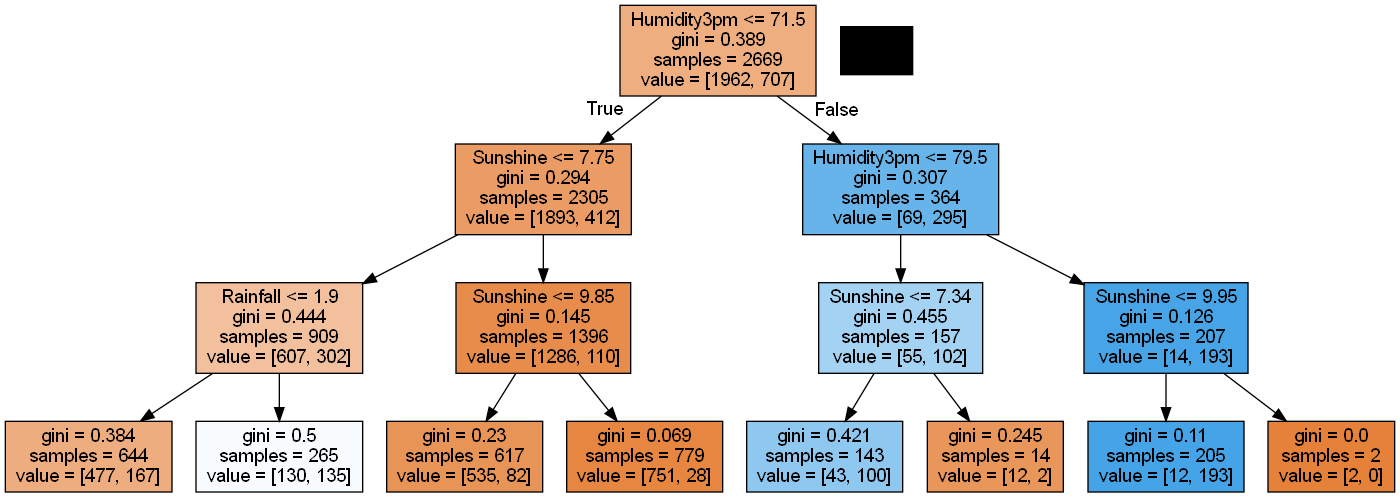

In [425]:
# Creating a dot file
dot_data1 = tree.export_graphviz(clf_tree, out_file = None, feature_names = X_train.columns, filled=True)
# Plotting tree
graph = pydotplus.graph_from_dot_data(dot_data1)
Image(graph.create_png())

## Bagging Classifier

In [106]:
# Importing classifier model to use
from sklearn.ensemble import BaggingClassifier

### Training the model

In [426]:
clftree=tree.DecisionTreeClassifier()
bag_clf=BaggingClassifier(estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

### Model Performance

In [427]:
# Predicting X_test values and creating confusion matrix
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[468,  42],
       [ 75,  83]], dtype=int64)

In [428]:
# Checking accuracy
accuracy_bagc = accuracy_score(y_test,bag_clf.predict(X_test))
accuracy_bagc

0.8248502994011976

In [429]:
# Checking train set accuracy
accuracy_score(y_train,bag_clf.predict(X_train))

1.0

In [430]:
# Checking ROC AUC score
roc_auc_score(y_test,bag_clf.predict(X_test))

0.7214817572598661

## Random Forest Classifier

In [110]:
# importing model to use
from sklearn.ensemble import RandomForestClassifier

### Training the model

In [431]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

### Model Performance

In [432]:
# Predicting X_test values and creating confusion matrix
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[481,  29],
       [ 76,  82]], dtype=int64)

In [433]:
# Checking accuracy
accuracy_rfc = accuracy_score(y_test,rf_clf.predict(X_test))
accuracy_rfc

0.842814371257485

In [434]:
# Checking train set accuracy
accuracy_score(y_train,rf_clf.predict(X_train))

1.0

In [435]:
# checking AUC score
roc_auc_score(y_test,rf_clf.predict(X_test))

0.7310622983370564

 ## Gradient Boosting

In [114]:
# Importing the model in use
from sklearn.ensemble import GradientBoostingClassifier

### Training the model

In [436]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### Model Performance

In [437]:
accuracy_gbc = accuracy_score(y_test, gbc_clf.predict(X_test))
accuracy_gbc

0.8383233532934131

In [438]:
accuracy_score(y_train, gbc_clf.predict(X_train))

0.8801049082053204

In [439]:
roc_auc_score(y_test,gbc_clf.predict(X_test))

0.7215686274509803

### Training Gradient Boosting Classifier using some parameter

In [440]:
# Applying learning rate = 0.02, n_estimators = 1000, tree depth 1
gbc_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [441]:
# Checking accuracy of training set
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.8467590857999251

In [442]:
# Checking accuracy of test set
accuracy_gbc2 = accuracy_score(y_test, gbc_clf2.predict(X_test))
accuracy_gbc2 

0.8413173652694611

In [443]:
# Checking AUC score
roc_auc_score(y_test,gbc_clf2.predict(X_test))

0.7213452469595433

## AdaBoost Classifier

In [122]:
# Importing model to use
from sklearn.ensemble import AdaBoostClassifier

### Training the model

In [444]:
# applying some hyper parameter values
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

### Model Performance

In [445]:
# Checking test set accuracy
accuracy_ada = accuracy_score(y_test, ada_clf.predict(X_test))
accuracy_ada

0.8323353293413174

In [446]:
# Checking train set accuracy
accuracy_score(y_train, ada_clf.predict(X_train))

0.8542525290370926

In [447]:
# Checking roc score
roc_auc_score(y_test,ada_clf.predict(X_test))

0.7154628940183668

### Using different parameters in AdaBoostClassifier to comapre the accuracy

In [448]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate = 0.05, n_estimators = 500)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

### Model Performance

In [449]:
# Checking train set accuracy
accuracy_score(y_train, ada_clf2.predict(X_train))

1.0

In [450]:
# Checking test set accuracy
accuracy_ada2 = accuracy_score(y_test, ada_clf2.predict(X_test))
accuracy_ada2

0.842814371257485

In [451]:
# Checking AUC score
roc_auc_score(y_test,ada_clf2.predict(X_test))

0.7288781335318937

## XGBoost Classifier

In [134]:
# importng model in use
import xgboost as xgb

### Training Model

In [452]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.3, n_estimators = 10000, n_jobs=-1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Model Performance

In [453]:
# Checking test set accuracy
accuracy_xgb = accuracy_score(y_test, xgb_clf.predict(X_test))
accuracy_xgb

0.8338323353293413

In [454]:
accuracy_score(y_train, xgb_clf.predict(X_train))

1.0

In [455]:
roc_auc_score(y_test,xgb_clf.predict(X_test))

0.7404690990320177

### Ploting Feature Importance Graph

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

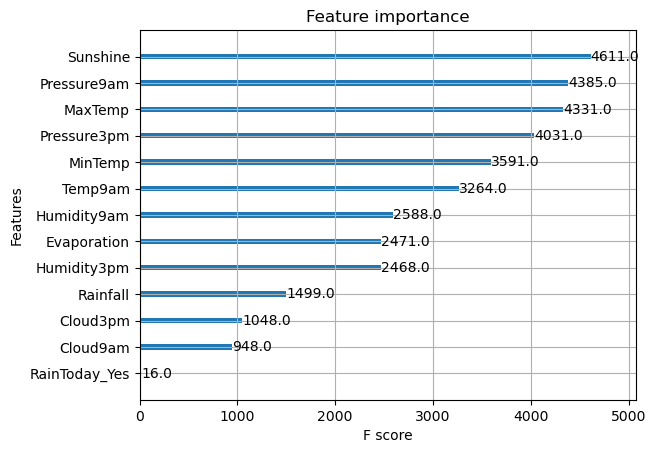

In [456]:
xgb.plot_importance(xgb_clf)

### Improving model performance using Grid Search Method

In [457]:
xgb_clf = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 300, random_state = 42)

In [458]:
# Difining hyperparameter dictionary
param_test1 = {
    'max_depth': range(3,10,2),
    'gamma'    :[0.2,0.3, 0.4],
    'subsample':[0.8,0.9],
    'colsample_bytree' : [0.8,0.9],
    'reg_alpha' : [1e-2,0.1,1]
}

### Training the model

In [459]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring ='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.2, 0.3, 0.4], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

### Model Performance

In [460]:
cvxg_clf = grid_search.best_estimator_

In [461]:
accu_xgbt2 = accuracy_score(y_train, cvxg_clf.predict(X_train))
accu_xgbt2

0.8688647433495691

In [462]:
accuracy_xgb2 = accuracy_score(y_test, cvxg_clf.predict(X_test))
accuracy_xgb2

0.8383233532934131

In [463]:
roc_auc_score(y_test,cvxg_clf.predict(X_test))

0.7150161330354926

In [464]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'max_depth': 5,
 'reg_alpha': 1,
 'subsample': 0.8}

## Camparing the accuracy score of different model

In [465]:
print("Logistic Regression Model: {}".format(accuracy_lr))
print("Linear Discrimnent Analysis Model: {}".format(accuracy_lda))
print("K Nearest Neighbours Model(K=1): {}".format(accuracy_knb1))
print("K Nearest Neighbours Model(K=3): {}".format(accuracy_knb2))
print("Decision Tree Classifier Model: {}".format(accuracy_dtc))
print("Bagging Classifier Model: {}".format(accuracy_bagc))
print("Random Forest Classifier Model: {}".format(accuracy_rfc))
print("Gradient Boosting Classifier Model: {}".format(accuracy_gbc))
print("Gradient Boosting Classifier Model 2 with Parameters: {}".format(accuracy_gbc2))
print("Ada Boosting Classifier Model: {}".format(accuracy_ada))
print("Ada Boosting Classifier Model 2 with Parameters: {}".format(accuracy_ada2))
print("XG Boosting Model: {}".format(accuracy_xgb))
print("XG Boosting Model 2 with Grid Search: {}".format(accuracy_xgb2))

Logistic Regression Model: 0.824992508240935
Linear Discrimnent Analysis Model: 0.8306862451303566
K Nearest Neighbours Model(K=1): 0.7455089820359282
K Nearest Neighbours Model(K=3): 0.7964071856287425
Decision Tree Classifier Model: 0.811377245508982
Bagging Classifier Model: 0.8248502994011976
Random Forest Classifier Model: 0.842814371257485
Gradient Boosting Classifier Model: 0.8383233532934131
Gradient Boosting Classifier Model 2 with Parameters: 0.8413173652694611
Ada Boosting Classifier Model: 0.8323353293413174
Ada Boosting Classifier Model 2 with Parameters: 0.842814371257485
XG Boosting Model: 0.8338323353293413
XG Boosting Model 2 with Grid Search: 0.8383233532934131


####  Separating models with highest accuracy and camparing with there train set accuracy:
1) Random Forest Classifier Model (Test) : 0.842814371257485 | (train) : 1.0
2) Gradient Boosting Classifier Model 2 with Parameters (Test): 0.8413173652694611 | (train) : 0.8467590857999251
3) Ada Boosting Classifier Model 2 with Parameters (Test): 0.842814371257485 | (train) : 1.0


### Creating Classification Report for Gradient Boosting Model 2 with Parameters as it negligible difference between train and test accuracy

In [466]:
# classification report of gradient boosting model
print(metrics.classification_report(y_test,gbc_clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       510
           1       0.75      0.49      0.60       158

    accuracy                           0.84       668
   macro avg       0.80      0.72      0.75       668
weighted avg       0.83      0.84      0.83       668



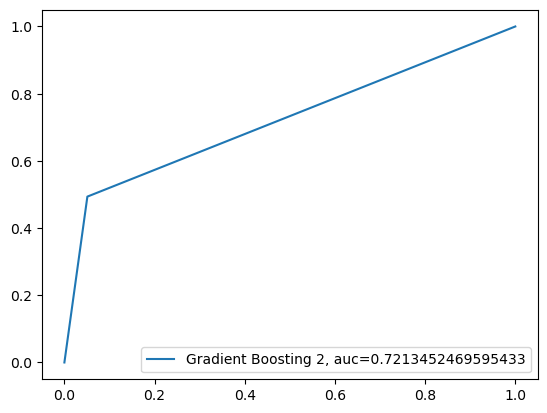

In [467]:
# Plotting ROC curve gradient boosting model
fpr, tpr, _ = metrics.roc_curve(y_test,  gbc_clf2.predict(X_test))
auc = metrics.roc_auc_score(y_test, gbc_clf2.predict(X_test))
plt.plot(fpr,tpr,label="Gradient Boosting 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Conclusion

### The Gradient Boosting Classifier Model 2 with parameters gives high test accuracy of 84% and the ROC AUC score of 0.7213. The difference between the test and train accuracy is negligible therefor the model is not overfitting. This model also takes less computational time as compared other similar model. Hence The Gradient Boosting Classifier Model 2 is the best model for this data.

The other models above either have slightly low accuracy or overfit the data.

# Q.3) What were the available ML model options you had to perform this task?
The following were the available ML model option for this task:
1) Logistic Regression Model
2) Linear Discrimnent Analysis
3) K Nearest Neighbours Model
4) Decision Tree Classifier Model
5) Bagging Classifier Model
6) Random Forest Classifier Model
7) Gradient Boosting Classifier
8) Ada Boosting Classifier Model
9) XG Boosting Model 

# Q.4) Which model’s performance is best and what could be the possible reason for that?
The Gradient Boosting Classifier Model 2 performed better for this dataset with highest accuracy score of 0.8467 and the difference between the test accuracy and train accuracy is also very small hence the model is not under or overfitting the data.Hence it is the best performing model for this dataset. In The Gradient Boosting Classifier Model technique each new tree learns from previously created trees which means each new decision tree is better then the previous one which gives better performance and accuracy.

# Q.5) What steps can you take to improve this selected model’s performance even further?
Steps to be taken to improve model performance are:
1) Collecting the missing values or the nan values in the dataset from the original source as much as possible because more accurate the data better the performance of the model
2) Collecting more fresh data from the source for this dataset as with more data we will be able to train the model better and hence increase performance.
3) We can also remove some predicter variable like Rainfall which do not have much significant impact on the dependent variable to improve performance.
4) Finaly we can train the model with more number of hyper parameters in grid search to increase the model performance even further